# Differential spectrum balance - Testing
This notebook is used to test this fitting method using different models and data. Who knowns what we'll find out here!

Tests need to be visualized against original data or other models as well as measured using main set of parameters:
- median
- variance
- standard deviation
- linear deviation
- covariance
- concordance

If need be add some stuff here, but please keep most of the pluming and junk in separate files somewhere we can't see them and just import functions or classes here... Idk why I'm writing a reminder like that to myself, but who knows.

_Gloria in excelsis Stella Caesa!_

In [1]:
# Main imports
import pandas as pd
import numpy as np

from modules.extra import poly_fit, dsb_fit
from modules.utils import multi_plot, statistics, timed
from modules.models import apply_noise

## Exponential model
Yeah, let's use our old pal for testing at first. Since it is an ideal model, it is defined in it's own file and  need to be imported.
General model parameters:
- form: f(x) = 0.0000005 * x**2
- size: 10000
- abn: 3

[poly] took 28.22180ms to complete.
[dsb] took 410.78850ms to complete.
[dsb_num] took 568.61480ms to complete.


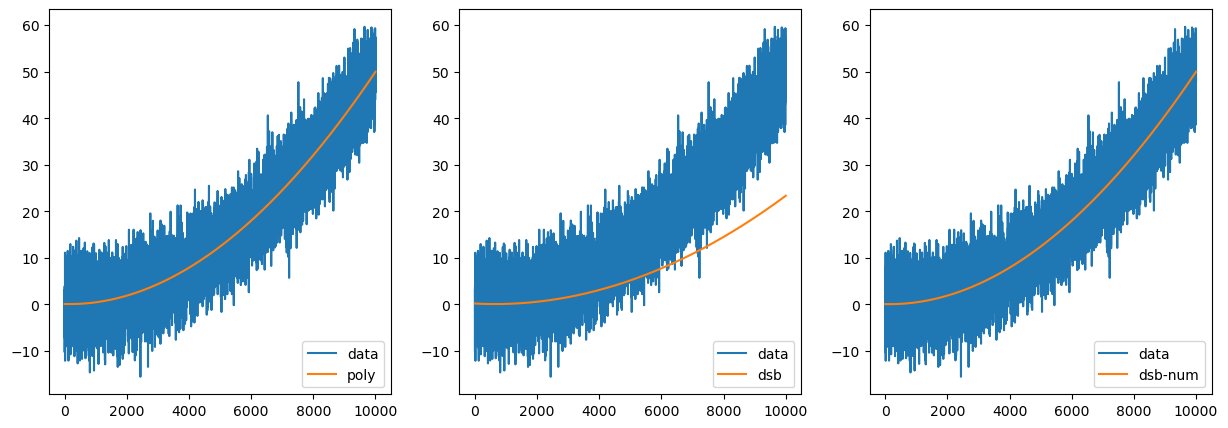

            d_med       d_var  std. div.         mse     lin. div.      conc
poly     0.052582  223.652578  14.955018    0.005231    639.728892  0.999983
dsb      7.323912   48.731366   6.980786  149.179453  92974.003015  0.640856
dsb-num  0.052318  223.654065  14.955068    0.004596    604.284185  0.999984
data     0.000000  222.180555  14.905722    0.000000      0.000000  1.000000


In [2]:
# Model import
from modules.models import exponential1

# Create
ideal = exponential1()
model = apply_noise(ideal.copy())

# Fitting
fitted_poly = timed(lambda: poly_fit(model, 4), label="poly")
fitted_dsb = timed(
    lambda: dsb_fit("a0 + a1*t + a2*exp(a3*t)", "t", model, numeric=False), label="dsb"
)
fitted_dsb_numeric = timed(
    lambda: dsb_fit("a0 + a1*t + a2*exp(a3*t)", "t", model), label="dsb_num"
)

# Display
results = (fitted_poly, "poly"), (fitted_dsb, "dsb"), (fitted_dsb_numeric, "dsb-num")
multi_plot(model, *results)
statistics(ideal, *results)

- form: $1.2*t + 0.1*e^{t*0.011}$
- size: 4000

[poly] took 6.63550ms to complete.
[dsb] took 139.87710ms to complete.
[dsb_num] took 440.57550ms to complete.


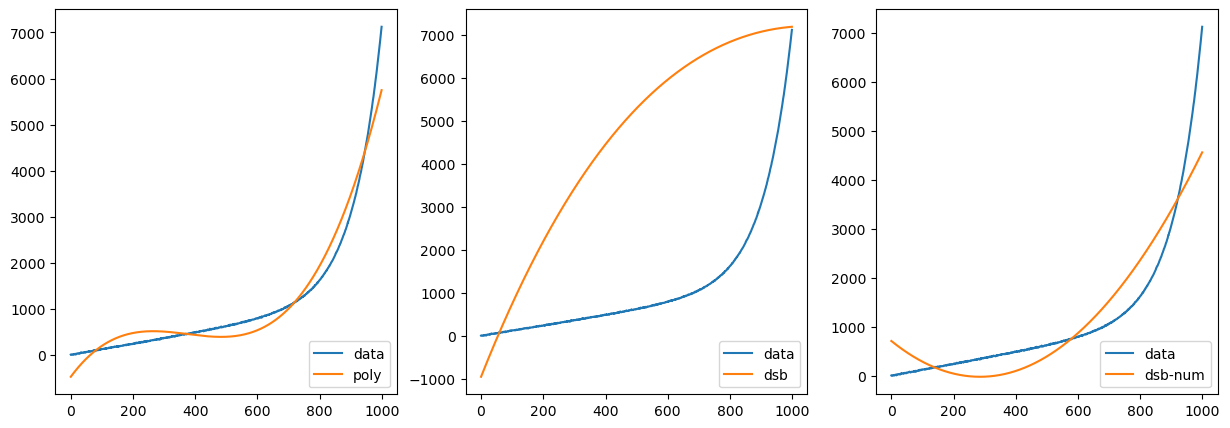

               d_med         d_var    std. div.           mse     lin. div.      conc
poly      125.362253  1.892401e+06  1375.645732  7.762125e+04  2.198319e+05  0.975933
dsb      4670.167027  5.624647e+06  2371.633805  1.511954e+07  3.487952e+06  0.144675
dsb-num    83.709489  1.688600e+06  1299.461417  2.813591e+05  4.046262e+05  0.921334
data        0.000000  1.970119e+06  1403.609117  0.000000e+00  0.000000e+00  1.000000


In [3]:
# Model import
from modules.models import exponential2

# Create
ideal = exponential2(1000)
model = apply_noise(ideal.copy())

# Fitting
fitted_poly = timed(lambda: poly_fit(model, 4), label="poly")
fitted_dsb = timed(
    lambda: dsb_fit("a0 + a1*t + a2*exp(a3*t)", "t", model, numeric=False), label="dsb"
)
fitted_dsb_numeric = timed(
    lambda: dsb_fit("a0 + a1*t + a2*exp(a3*t)", "t", model), label="dsb_num"
)

# Display
results = (fitted_poly, "poly"), (fitted_dsb, "dsb"), (fitted_dsb_numeric, "dsb-num")
multi_plot(model, *results)
statistics(ideal, *results)

## Real data: USD Exchange
This dataset is fairly small, but it is good enough to test nonlinear stuff, since previous model was just fine even with polynomial.
- form: ???
- size: 161

[poly] took 10.20090ms to complete.
[dsb] took 356.00740ms to complete.
[dsb_num] took 356.74730ms to complete.


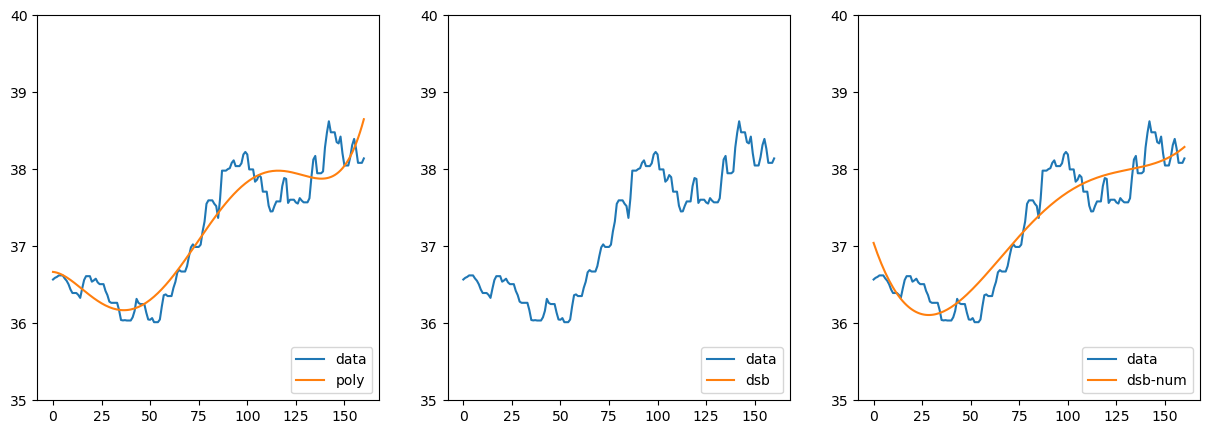

             d_med      d_var  std. div.          mse    lin. div.      conc
poly      0.191863   0.561493   0.749328     0.070356    34.292776  0.912883
dsb      35.873819  24.555325   4.955333  1128.629899  5334.424885 -0.004300
dsb-num   0.184395   0.547425   0.739882     0.084420    39.679175  0.902395
data      0.000000   0.631848   0.794889     0.000000     0.000000  1.000000


In [4]:
# Read data
raw_data = pd.read_excel("data/usd_2023-2024_1.xlsx", "USD")
usd_data = np.array(raw_data.iloc[0:161, 6].values)

# Fitting
fitted_poly = timed(lambda: poly_fit(usd_data, 6), label="poly")
fitted_dsb = timed(
    lambda: dsb_fit(
        "a0 + a1*t + a2*sin(a3*t) + a4*cos(a5*t)", "t", usd_data, numeric=False
    ),
    label="dsb",
)
fitted_dsb_numeric = timed(
    lambda: dsb_fit("a0 + a1*t + a2*sin(a3*t) + a4*cos(a5*t)", "t", usd_data),
    label="dsb_num",
)

# Display
results = (fitted_poly, "poly"), (fitted_dsb, "dsb"), (fitted_dsb_numeric, "dsb-num")
multi_plot(usd_data, *results, ylims=(35, 40))
statistics(usd_data, *results)

### 4 rank stuff
Let's try the same model but without cosine part, so it should be 4th rank.

> commented out to avoid errors

In [5]:
# # Fitting
# fitted_poly = timed(lambda: poly_fit(usd_data, 5), label="poly")
# fitted_dsb = timed(
#     lambda: dsb_fit(
#         "a0 + a1*t + a2*sin(a3*t)", "t", usd_data, numeric=False
#     ),
#     label="dsb",
# )
# fitted_dsb_numeric = timed(
#     lambda: dsb_fit("a0 + a1*t + a2*sin(a3*t)", "t", usd_data),
#     label="dsb_num",
# )

# # Display
# results = (fitted_poly, "poly"), (fitted_dsb, "dsb"), (fitted_dsb_numeric, "dsb-num")
# multi_plot(usd_data, *results, ylims=(35, 40))
# statistics(usd_data, *results)

Aaand it doesn't really work, cause DSB has a weakness - it the system of nonlinear equations is unsolvable when one or more of the series partitions are nullified.

Here is where it happens:

In [6]:
def failing_model_test():
    # Eah, i didn't want to import this, yet here we are 
    import sympy as sp
    t, a0, a1, a2, a3 = sp.symbols("t, a0, a1, a2, a3")
    # Model definition
    failing_model = a0 + a1*t + a2 *sp.sin(a3*t)
    display("Failing model:", failing_model)
    # Series expansion
    series = sp.series(failing_model, t).removeO()
    display("Series expansion:", series)

failing_model_test()

'Failing model:'

a0 + a1*t + a2*sin(a3*t)

'Series expansion:'

a0 + a2*a3**5*t**5/120 - a2*a3**3*t**3/6 + t*(a1 + a2*a3)

No coeffs for $t^2$ and for $t^4$, as one can see, so no DSB here.

### Extrapolation
Let's try extra for this model since i have future data lying around.

[poly] took 5.50670ms to complete.
[dsb] took 216.70460ms to complete.
[dsb_num] took 335.95590ms to complete.


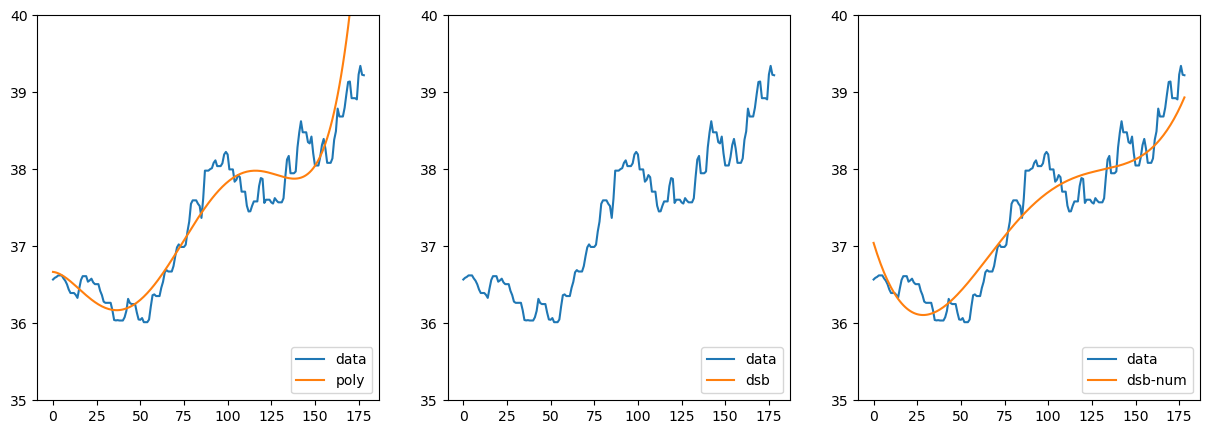

             d_med      d_var  std. div.          mse    lin. div.      conc
poly      0.008850   1.367871   1.169560     0.266368    55.644263  0.885912
dsb      35.183895  57.351572   7.573082  1030.176152  5548.144398 -0.008702
dsb-num   0.081245   0.670088   0.818589     0.089025    45.669096  0.937804
data      0.000000   0.842787   0.918034     0.000000     0.000000  1.000000


In [7]:
# Read extra data
raw_data_extra = pd.read_excel("data/usd_2023-2024_2.xlsx", "USD")
usd_data_extra = np.array(raw_data_extra.iloc[0:179, 6].values)
extra = usd_data_extra.size


# Fitting
fitted_poly = timed(lambda: poly_fit(usd_data, 6, length=extra), label="poly")
fitted_dsb = timed(
    lambda: dsb_fit(
        "a0 + a1*t + a2*sin(a3*t) + a4*cos(a5*t)",
        "t",
        usd_data,
        numeric=False,
        length=extra,
    ),
    label="dsb",
)
fitted_dsb_numeric = timed(
    lambda: dsb_fit(
        "a0 + a1*t + a2*sin(a3*t) + a4*cos(a5*t)", "t", usd_data, length=extra
    ),
    label="dsb_num",
)

# Display
results = (fitted_poly, "poly"), (fitted_dsb, "dsb"), (fitted_dsb_numeric, "dsb-num")
multi_plot(usd_data_extra, *results, ylims=(35, 40))
statistics(usd_data_extra, *results)

## Transcendental model
This is another one of the ideal models, so needs to be imported. Uses trigonometry, so may be more difficult for DSB, let's see.

Model parameters:
- form: 0.2\*sin(0.005\*t) + 2.12\*cos(0.005*t)
- size: 10000
- sigma: 1

[poly] took 8.73090ms to complete.
[dsb] took 157.57180ms to complete.
[dsb_num] took 100.86830ms to complete.


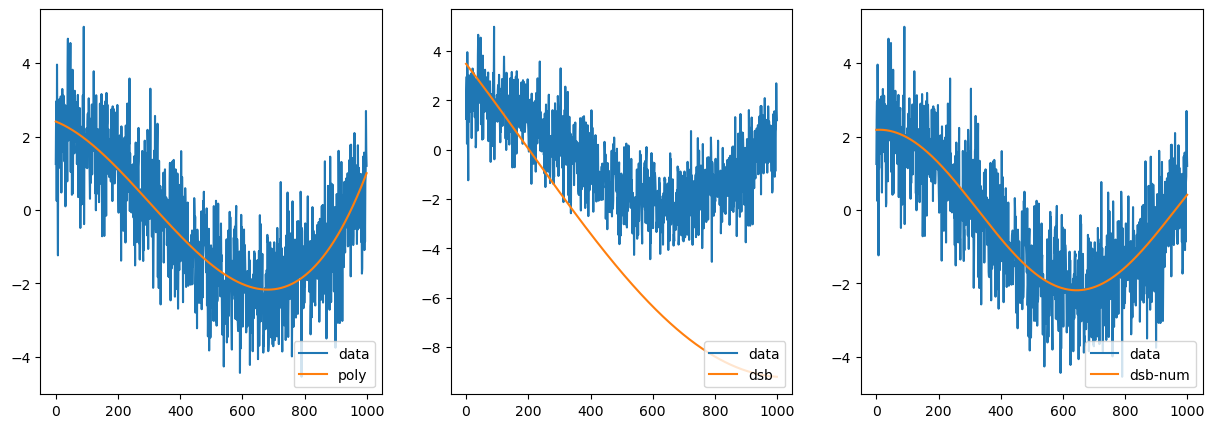

            d_med      d_var  std. div.        mse    lin. div.      conc
poly     0.144656   2.132207   1.460208   1.065411   828.479122  0.796975
dsb      4.376415  15.719714   3.964809  24.101344  4009.347386  0.246606
dsb-num  0.130549   2.152217   1.467044   1.050747   822.071377  0.801049
data     0.000000   3.197618   1.788189   0.000000     0.000000  1.000000


In [8]:
# Import model
from modules.models import transcendental1

ideal = transcendental1()
model = apply_noise(ideal, sigma=1)

# Fitting
fitted_poly = timed(lambda: poly_fit(model, 4), label="poly")
fitted_dsb = timed(
    lambda: dsb_fit("a0*sin(w*t) + a1*cos(w*t)", "t", model, numeric=False), label="dsb"
)
fitted_dsb_numeric = timed(
    lambda: dsb_fit("a0*sin(a2*t) + a3*cos(a2*t)", "t", model), label="dsb_num"
)

# Display
results = (fitted_poly, "poly"), (fitted_dsb, "dsb"), (fitted_dsb_numeric, "dsb-num")
multi_plot(model, *results)
statistics(ideal, *results)

Looks fine here, let's try another form.
- form: 21.5\*sin(0.02\*t) - 12.3\*cos(0.02*t)

[poly] took 10.12640ms to complete.
[dsb] took 85.30070ms to complete.
[dsb_num] took 72.89110ms to complete.


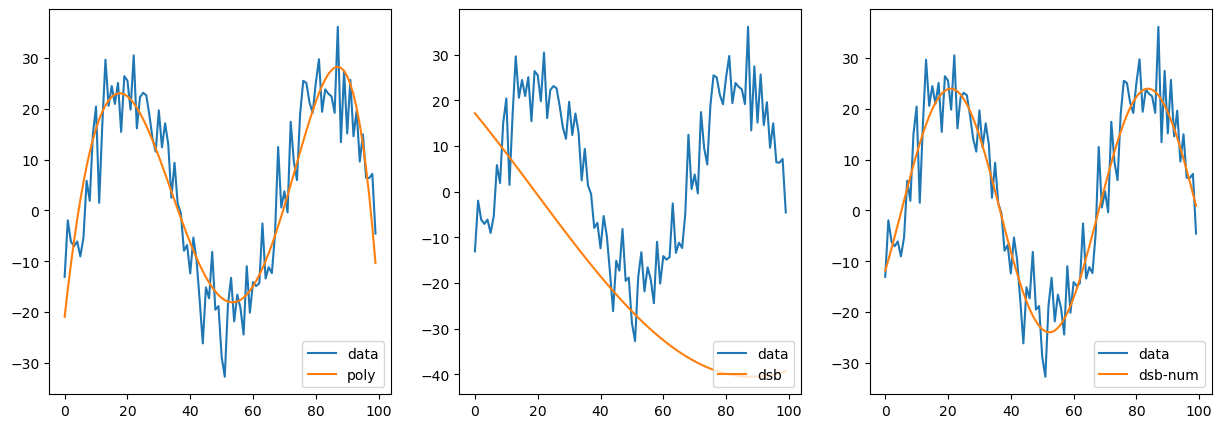

             d_med       d_var  std. div.          mse    lin. div.      conc
poly      1.412707  235.552780  15.347729    18.220817   372.507414  0.960894
dsb      33.630346  346.013298  18.601433  1212.786123  2813.422362  0.021275
dsb-num   0.264733  254.250127  15.945223     0.320360    50.833585  0.999299
data      0.000000  271.806627  16.486559     0.000000     0.000000  1.000000


In [9]:
from modules.models import transcendental2

ideal = transcendental2()
model = apply_noise(ideal.copy())

# Fitting
fitted_poly = timed(lambda: poly_fit(model, 6), label="poly")
fitted_dsb = timed(
    lambda: dsb_fit("a0*sin(a2*t) + a3*cos(a2*t)", "t", model, numeric=False), label="dsb"
)
fitted_dsb_numeric = timed(
    lambda: dsb_fit("a0*sin(a2*t) + a3*cos(a2*t)", "t", model, maxfev=1000), label="dsb_num"
)

# Display
results = (fitted_poly, "poly"), (fitted_dsb, "dsb"), (fitted_dsb_numeric, "dsb-num")
multi_plot(model, *results)
statistics(ideal, *results)

Hm, need to trim maxfev to prevent overfitting, otherwise looks fine. If dataset captures more than a couple of function's periods, than numeric part of the fitting fails, so need to be careful.

### 5 rank stuff
Let's try higher rank again, even tho it didn't work out previously.
- form: -7.22\*cos(0.015\*t) - 0.54\*sin(0.015\*t) + 1.9\*cos(0.015*t)
- size: 500

> It sure didn't work here as well

In [10]:
# from modules.models import transcendental3

# ideal = transcendental3()
# model = apply_noise(ideal)

# # Fitting
# fitted_poly = timed(lambda: poly_fit(model, 6), label="poly")
# fitted_dsb = timed(
#     lambda: dsb_fit("a0*cos(a1*t) + a2*sin(a1*t) + a3*cos(a1*t) + a4*sin(a1*t)", "t", model, numeric=False), label="dsb"
# )
# fitted_dsb_numeric = timed(
#     lambda: dsb_fit("a0*cos(a1*t) + a2*sin(a1*t) + a3*cos(a1*t) + a4*sin(a1*t)", "t", model, maxfev=1000), label="dsb_num"
# )

# # Display
# results = (fitted_poly, "poly"), (fitted_dsb, "dsb"), (fitted_dsb_numeric, "dsb-num")
# multi_plot(model, *results)
# statistics(ideal, *results)

The reason here is there is no solutions for the balance even for different ranks (I've tried 4th, 5th and 6th, which is max). What to do here I have no idea tbh.

### Extrapolation
We need to test extra for this type of process because we need to confirm period matching.

[poly] took 9.42660ms to complete.
[dsb_num] took 90.70190ms to complete.


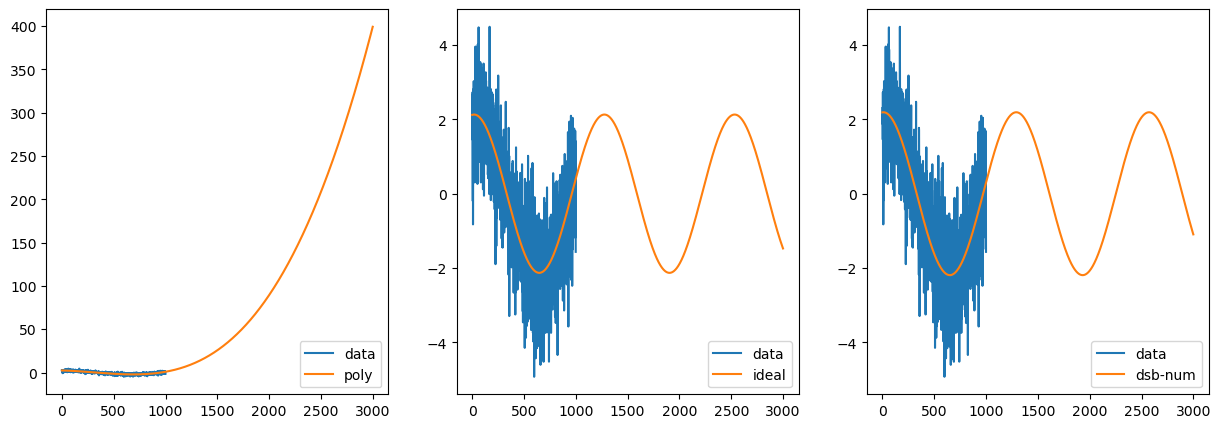

             d_med         d_var   std. div.           mse      lin. div.      conc
poly     25.450675  12373.125941  111.234554  19380.114599  252032.428865  0.003210
ideal     0.000000      2.192737    1.480789      0.000000       0.000000  1.000000
dsb-num   0.047662      2.319165    1.522881      0.044177     476.685894  0.989801
data      0.000000      2.192737    1.480789      0.000000       0.000000  1.000000


In [11]:
# Import model
from modules.models import transcendental1

extra = 3000
ideal = transcendental1()
ideal_extra = transcendental1(extra)
model = apply_noise(ideal.copy(), sigma=1)

# Fitting
fitted_poly = timed(lambda: poly_fit(model, 4, length=extra), label="poly")
fitted_dsb_numeric = timed(
    lambda: dsb_fit("a0*sin(a2*t) + a3*cos(a2*t)", "t", model, length=extra), label="dsb_num"
)

# Display
results = (fitted_poly, "poly"), (ideal_extra, "ideal"), (fitted_dsb_numeric, "dsb-num")
multi_plot(model, *results)
statistics(ideal_extra, *results)